In [1]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

In [7]:
import numpy as np

try:
  
  loaded_data = np.loadtxt('./diabetes.csv', delimiter = ',')

  x_data = loaded_data[ :, :-1]
  t_data = loaded_data[ :, [-1]]

  print('x_data.shape = ', x_data.shape)
  print('t_data.shape = ', t_data.shape)

except Exception as err:

  print(str(err))

x_data.shape =  (759, 8)
t_data.shape =  (759, 1)


# RANDOM Shuffle

In [8]:
print(x_data[:2])
print(t_data[:2])

s = np.arange(len(x_data))

print(s)

np.random.shuffle(s)

print(s)

x_data = x_data[s]
t_data = t_data[s]

print(x_data[:2])
print(t_data[:2])

[[-0.294118    0.487437    0.180328   -0.292929    0.          0.00149028
  -0.53117    -0.0333333 ]
 [-0.882353   -0.145729    0.0819672  -0.414141    0.         -0.207153
  -0.766866   -0.666667  ]]
[[0.]
 [1.]]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193

# TEST SPLIT

In [9]:
TEST_SPLIT_RATIO = 0.1

test_nums = int(TEST_SPLIT_RATIO * len(x_data))

print('test_nums =', test_nums)

x_test = x_data[:test_nums]
t_test = t_data[:test_nums]

x_data = x_data[test_nums:]
t_data = t_data[test_nums:]

print(x_data.shape, t_data.shape)
print(x_test.shape, t_test.shape)

test_nums = 75
(684, 8) (684, 1)
(75, 8) (75, 1)


# VAL SPLIT

In [10]:
SPLIT_RATIO = 0.1

val_nums = int(SPLIT_RATIO * len(x_data))

print('val_nums = ', val_nums)

x_val = x_data[:val_nums] # 0 - 74까지 validation set
t_val = t_data[:val_nums]

x_data = x_data[val_nums:]
t_data = t_data[val_nums:]

print(x_data.shape, t_data.shape)
print(x_val.shape, t_val.shape)

val_nums =  68
(616, 8) (616, 1)
(68, 8) (68, 1)


# MODEL

In [13]:
t_data.shape

(616, 1)

In [15]:
model = Sequential()

model.add(Dense(t_data.shape[1], input_shape = (x_data.shape[1], ), activation = 'sigmoid'))

In [16]:
model.compile(optimizer = SGD(learning_rate = 0.01), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [20]:
from datetime import datetime

start_time = datetime.now()

hist = model.fit(x_data, t_data, epochs = 500, validation_data = (x_val, t_val), verbose = 2)

end_time = datetime.now()

print('Elapsed time =>> ', end_time - start_time)

## 19/19는 training data의 batch size를 말함 (default 값이 32이여서 758 * 0.8 / 32 = 19임 )
### val_loss, val_accuracy --> validation set을 하는 것임

Epoch 1/500
20/20 - 1s - loss: 0.7812 - accuracy: 0.4334 - val_loss: 0.7640 - val_accuracy: 0.3971 - 620ms/epoch - 31ms/step
Epoch 2/500
20/20 - 0s - loss: 0.7614 - accuracy: 0.4740 - val_loss: 0.7434 - val_accuracy: 0.4118 - 62ms/epoch - 3ms/step
Epoch 3/500
20/20 - 0s - loss: 0.7459 - accuracy: 0.4886 - val_loss: 0.7264 - val_accuracy: 0.4412 - 78ms/epoch - 4ms/step
Epoch 4/500
20/20 - 0s - loss: 0.7333 - accuracy: 0.5081 - val_loss: 0.7130 - val_accuracy: 0.4853 - 82ms/epoch - 4ms/step
Epoch 5/500
20/20 - 0s - loss: 0.7235 - accuracy: 0.5081 - val_loss: 0.7005 - val_accuracy: 0.5147 - 68ms/epoch - 3ms/step
Epoch 6/500
20/20 - 0s - loss: 0.7145 - accuracy: 0.5325 - val_loss: 0.6891 - val_accuracy: 0.5441 - 75ms/epoch - 4ms/step
Epoch 7/500
20/20 - 0s - loss: 0.7063 - accuracy: 0.5406 - val_loss: 0.6793 - val_accuracy: 0.5588 - 79ms/epoch - 4ms/step
Epoch 8/500
20/20 - 0s - loss: 0.6995 - accuracy: 0.5536 - val_loss: 0.6712 - val_accuracy: 0.5588 - 69ms/epoch - 3ms/step
Epoch 9/500
20

In [21]:
model.evaluate(x_test, t_test)

3/3 [==============================] - 0s 5ms/step - loss: 0.4739 - accuracy: 0.7600


[0.4738765060901642, 0.7599999904632568]

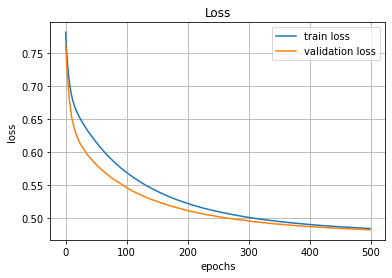

In [22]:
import matplotlib.pyplot as plt

plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label = 'train loss')
plt.plot(hist.history['val_loss'], label = 'validation loss')

plt.legend(loc = 'best')

plt.show()

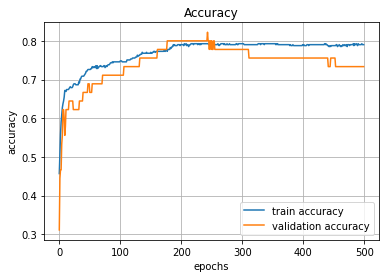

In [ ]:
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label = 'train accuracy')
plt.plot(hist.history['val_accuracy'], label = 'validation accuracy')

plt.legend(loc = 'best')

plt.show(
)

In [ ]:
model.weights

[<tf.Variable 'dense_2/kernel:0' shape=(8, 2) dtype=float32, numpy=
 array([[ 0.79891706, -0.11953527],
        [ 2.3741896 , -1.0485591 ],
        [-0.18173729,  0.09797667],
        [ 0.79418385,  0.41762045],
        [ 0.47824994, -0.00871392],
        [ 0.91306967, -0.9016555 ],
        [-0.09673635, -0.55052215],
        [ 0.43146503,  0.33067703]], dtype=float32)>,
 <tf.Variable 'dense_2/bias:0' shape=(2,) dtype=float32, numpy=array([-0.24551426,  0.24551417], dtype=float32)>]